In [1]:
from __future__ import division
import scipy.stats as sp
import numpy as np
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [51]:
sns.set_style('white')
#sns.set_context("notebook")

### single coin example

#### unknown population distribution

In [69]:
sample_size = 30
null_single = sp.bernoulli(.5)

In [70]:
sample = null_single.rvs(size=sample_size)

In [71]:
sample_stat = np.mean(sample)


#### calculate sampling distribution of mean

###### by Resampling

In [72]:
num_simulations = 10000

In [73]:
resample_dist = []
for _ in range(num_simulations):
    resample = np.random.choice(sample, size=len(sample), replace=True)
    resample_mean = np.mean(resample)
    resample_dist.append(resample_mean)

##### by Central Limit Theorem

In [74]:
clt_mean = np.mean(sample)
clt_var = np.var(sample)/sample_size

In [75]:
clt_dist = sp.norm(loc=clt_mean, scale=np.sqrt(clt_var))

##### Plot of Both Sampling Distributions

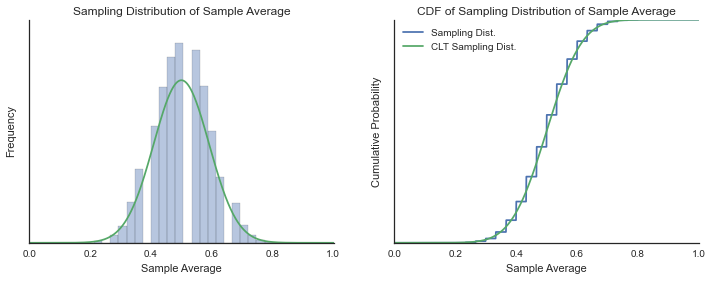

In [99]:
x = np.linspace(0,1,1000)

fig, axes = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(12)

sns.distplot(resample_dist, bins=25, kde=False, norm_hist=True, ax=axes[0])
axes[0].plot(x, clt_dist.pdf(x))
axes[0].set(yticklabels=[], title='Sampling Distribution of Sample Average')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Sample Average')

resample_emp_cdf = sm.tools.tools.ECDF(resample_dist)
axes[1].plot(x, resample_emp_cdf(x), label='Sampling Dist.')
axes[1].plot(x, clt_dist.cdf(x), label='CLT Sampling Dist.')
axes[1].set(yticklabels=[], title='CDF of Sampling Distribution of Sample Average')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_xlabel('Sample Average')
axes[1].legend(loc='best')

 #axes[i, j].set_title('Sample Size = {}'.format(str(sample_sizes[sample_idx])))
        #axes[i, j].
        #axes[i, j].set_xlabel('Sample Average')
        

sns.despine(top=True, right=True)

### two coin example

#### unknown population distribution

In [85]:
sample_size_one = 30
sample_size_two = 40
coin_one = sp.bernoulli(.5)
coin_two = sp.bernoulli(.7)

In [86]:
sample_one = coin_one.rvs(size=sample_size_one)
sample_two = coin_two.rvs(size=sample_size_two)
all_data = np.concatenate([sample_one, sample_two])

In [87]:
two_coin_sample_stat = np.mean(sample_one) - np.mean(sample_two)

#### sampling distro and t test

In [88]:
two_coin_num_simulations = 10000

In [89]:
two_coin_diff_dist = []
for _ in range(two_coin_num_simulations):
    resample = np.random.choice(all_data, size=len(all_data), replace=False)
    resample_one, resample_two = np.split(resample, [len(sample_one)])
    two_coin_diff_dist.append(np.mean(resample_one) - np.mean(resample_two))

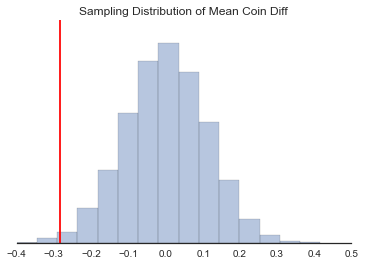

In [90]:
ax = sns.distplot(two_coin_diff_dist, bins=15, kde=False, norm_hist=True)
ax.axvline(two_coin_sample_stat, color='red')

ax.set(yticklabels=[], title='Sampling Distribution of Mean Coin Diff')
sns.despine(top=True, left=True, right=True)

In [91]:
two_coin_p_value = sum(two_coin_diff_dist < two_coin_sample_stat)/len(two_coin_diff_dist)

In [92]:
two_coin_p_value

0.0047999999999999996